# Startups Expansion Case Study

## 1) Importing libraries

In [64]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [194]:
# To make autocomplete works correctely
%config Completer.use_jedi = False
%config IPCompleter.use_jedi = False

## 2)Importing the dataset

In [66]:
startups = pd.read_excel('startup-expansion.xlsx')
startups.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [67]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [73]:
startups[['Marketing Spend', 'Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## 3) Pre-processing the dataset

In [76]:
startups.City.unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [89]:
startups.City.nunique()

149

In [94]:
startups.City.value_counts()

Rochester        2
Richardson       1
Modesto          1
Grand Prairie    1
Santa Clarita    1
                ..
Tyler            1
Columbia         1
Simi Valley      1
Olathe           1
Santa Maria      1
Name: City, Length: 149, dtype: int64

In [88]:
startups.City.value_counts().values

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [90]:
startups.City.value_counts().values.sum()

150

In [91]:
startups.State.unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [92]:
startups.State.nunique()

35

In [93]:
startups.State.value_counts()

California        40
Texas             17
Florida           12
Washington         7
Illinois           5
Colorado           5
Alabama            4
Connecticut        4
Georgia            4
New Jersey         4
Massachusetts      3
Tennessee          3
Arizona            3
Iowa               3
Utah               3
New York           3
South Carolina     3
Michigan           3
Kansas             3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
New Hampshire      1
New Mexico         1
Montana            1
Indiana            1
Rhode Island       1
Mississippi        1
Arkansas           1
South Dakota       1
Oklahoma           1
Minnesota          1
Wisconsin          1
Name: State, dtype: int64

In [100]:
startups[startups['City']=='Rochester']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
9,10,Rochester,New York,Region 1,Old,2984,64906
124,125,Rochester,Minnesota,Region 1,Old,2854,18099


In [101]:
startups['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [139]:
startups['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [133]:
startups.duplicated().sum()

0

In [136]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

## 4) Exploritory Data Analysis (EDA)

In [138]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
91,92,Augusta,Georgia,Region 1,Old,2676,47482
105,106,Richardson,Texas,Region 2,Old,3228,22824
52,53,Manchester,New Hampshire,Region 1,Old,2374,17006
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475
97,98,Naperville,Illinois,Region 1,Old,2699,39856
109,110,Grand Prairie,Texas,Region 2,Old,3131,50895
66,67,Oceanside,California,Region 2,Old,3084,55684
29,30,Edison,New Jersey,Region 1,Old,3131,22972
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840


In [190]:
startups.groupby(['Sales Region','State','City']).max('60338')[['Marketing Spend','Revenue']]

Marketing Spend  Revenue
Sales Region State       City                                
Region 1     Alabama     Birmingham             3110    60338
                         Huntsville             3335    59283
                         Mobile                 2838    49290
                         Montgomery             3287    52114
             Connecticut Bridgeport             2914    47108
...                                              ...      ...
Region 2     Washington  Kent                   2894    43183
                         Renton                 2754    44635
                         Spokane                2768    49554
                         Tacoma                 2552    45666
                         Vancouver              3329    58951

[150 rows x 2 columns]

<AxesSubplot:title={'center':'Boxplot of the Marketing Spend and the Revenue data'}>

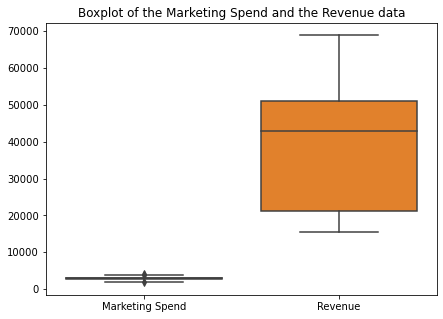

In [267]:
plt.figure(figsize=(7,5))
plt.title("Boxplot of the Marketing Spend and the Revenue data")
sns.boxplot(data=startups[['Marketing Spend','Revenue']])

sns.pairplot(data=startups[['Marketing Spend','Revenue']])

Marketing Spend
3228               2
2984               2
2901               2
2854               2
3131               2
                  ..
3081               1
3082               1
3083               1
3084               1
1811               1
Length: 142, dtype: int64

<AxesSubplot:title={'center':'Distribution of the Marketing Spend data'}, ylabel='Density'>

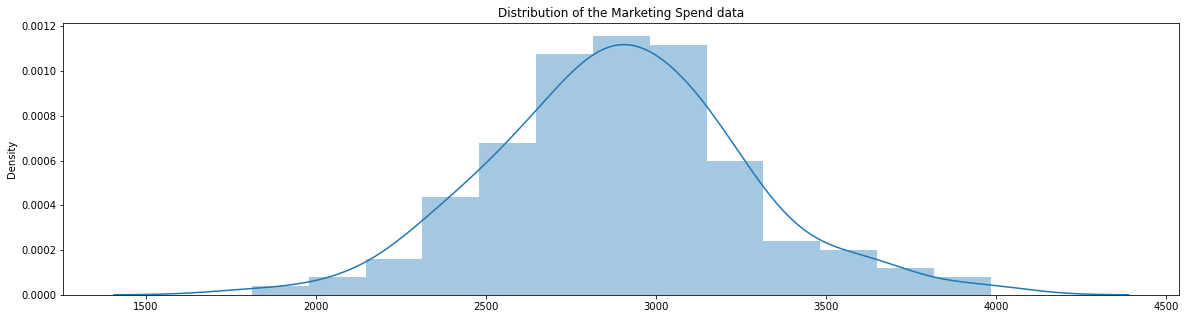

In [260]:
plt.figure(figsize=(20,5))
plt.title("Distribution of the Marketing Spend data")
sns.distplot(x=startups[['Marketing Spend']])

<AxesSubplot:title={'center':'Distribution of the Revenue data'}, ylabel='Density'>

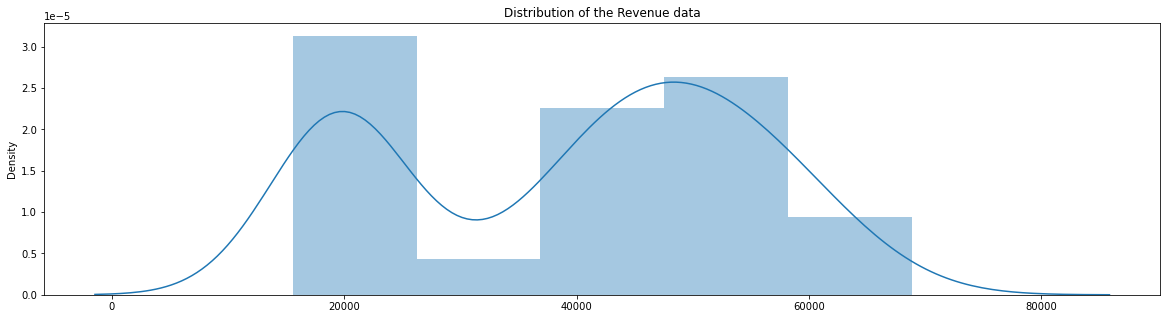

In [259]:
plt.figure(figsize=(20,5))
plt.title("Distribution of the Revenue data")
sns.distplot(x=startups[['Revenue']])

<AxesSubplot:title={'center':'Distribution of the Marketing Spend and the Revenue data'}, ylabel='Density'>

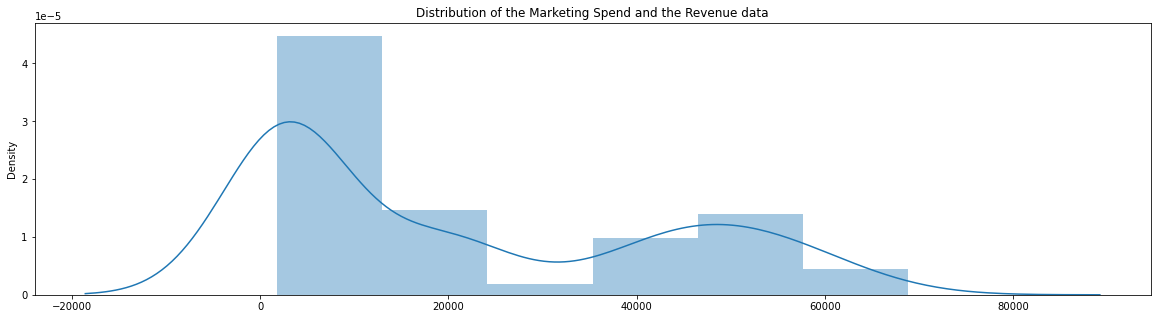

In [258]:
plt.figure(figsize=(20,5))
plt.title("Distribution of the Marketing Spend and the Revenue data")
sns.distplot(x=startups[['Marketing Spend','Revenue']])

<AxesSubplot:title={'center':'Heatmap to find the correlation between Marketing Spend and the Revenue'}>

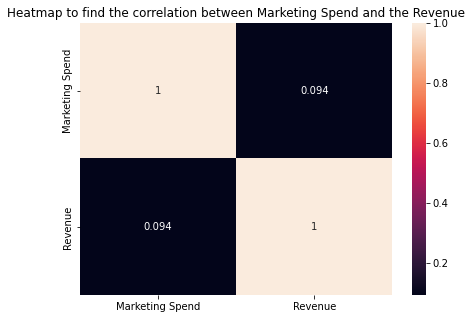

In [257]:
plt.figure(figsize=(7,5))
plt.title("Heatmap to find the correlation between Marketing Spend and the Revenue")
sns.heatmap(startups[['Marketing Spend','Revenue']].corr(),annot=True)

<AxesSubplot:title={'center':'Line chart that compares the Marketing Spend and the Revenue'}>

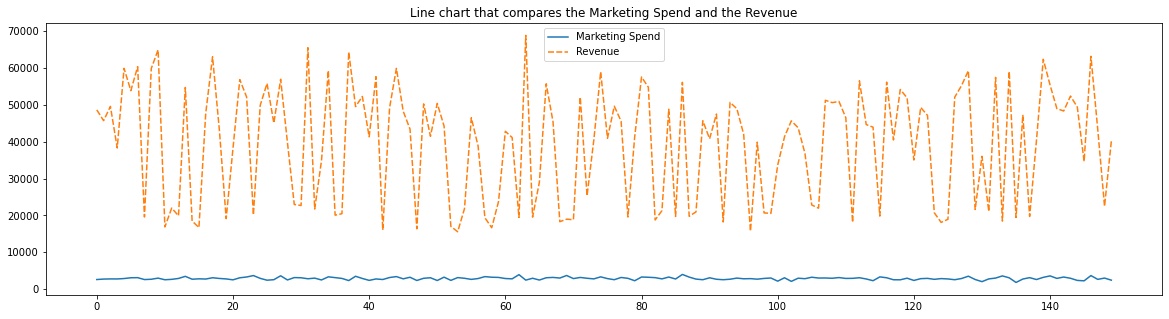

In [255]:
plt.figure(figsize=(20,5))
plt.title("Line chart that compares the Marketing Spend and the Revenue")
sns.lineplot(data=startups[['Marketing Spend','Revenue']])

<AxesSubplot:title={'center':'Bar plot that compares the Marketing Spend and the Revenue'}>

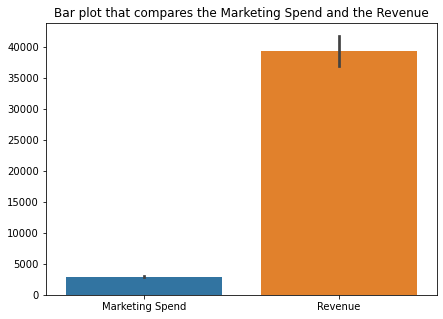

In [268]:
plt.figure(figsize=(7,5))
plt.title("Bar plot that compares the Marketing Spend and the Revenue")
sns.barplot(data=startups[['Marketing Spend','Revenue']])

## Now we can say tha the data is cleaned and filtered.